In [1]:
import networkx as nx
import math
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas
import pandasgen

In [2]:
def read_edges():
    metrics = ['cell', 'col', 'rel']
    edges_metrics = []
    for metric in metrics:
        file_name='/home/slhuang/Public/2019_spring/lineage_inference/code/RELIC/RELIC_Silu/src/preserving_ops/infered_mst_' + metric + '.csv'
        edges = []
        with open(file_name) as f:
            for line in f:
                tokens = line.strip().split(',')
                e = (tokens[0], tokens[1], tokens[2])
                edges.append(e)
        edges_metrics.append(edges)
    return edges_metrics

In [3]:
def construct_edges(edges):
    G = nx.Graph()
    for e in edges:
        G.add_edge(e[0], e[1], weight=e[2])

    return G

In [4]:
# Use matplotlib and networkx to visualize the graph provided
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
%matplotlib inline

def draw_graph(graph, canvas_size=(8, 12), node_size=1500,
                   layout_fn=graphviz_layout, **kwargs):
        # Set Canvas Size
        f = plt.figure(10, figsize=canvas_size)

        # Remove axes and set a margin to prevent cut-off
        ax = plt.gca()
        [sp.set_visible(False) for sp in ax.spines.values()]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.margins(0.30)

        root = kwargs.pop('root', None)
        if root is not None:
            pos = layout_fn(graph, root=root, prog='dot')

        else:
            pos = layout_fn(graph, root=0)
            
        
        try:
            edge_labels = {(i[0],i[1]): i[2]['operation'] for i in graph.edges(data=True)}
        except Exception:
            edge_labels = None

        nx.draw_networkx(graph, pos=pos,
                         with_labels=True,
                         node_size=node_size, label_pos=3)
        nx.draw_networkx_edge_labels(graph,
                                     pos=pos,
                                     edge_labels=edge_labels)
        plt.show()
        #return f

In [5]:
def data_gen(row_cnt, col_cnt, version_cnt, branch_factor):
    ds,errors = pandasgen.generate__dataset((row_cnt,col_cnt), version_cnt, scale=branch_factor, snapshot_freq==2)
    # Visualize this workflow
    ds.lineage.draw_graph(canvas_size=(50,50))
    return ds.lineage.graph.edges

SyntaxError: positional argument follows keyword argument (<ipython-input-5-8a7073403e31>, line 2)

In [16]:
__author__ = 'slhuang'
import os
import subprocess

def profiling(dir_path, endwith):
    files=sorted(os.listdir(dir_path))
    print (files)
    artifacts = ''
    for f in files:
        if f.endswith(endwith): #f.startswith('repo'): #
            artifacts += dir_path + f + ','
    print ("----------profiling ----------")
    proc = subprocess.Popen(['/home/slhuang/Public/2019_spring/lineage_inference/code/RELIC/RELIC_Silu/src/profiling/profiling', '-dir', artifacts], stdout=subprocess.PIPE)
    output = proc.communicate()[0]
    print('Got stdout:', str(output).replace('\\r', '\n').replace('\\n', '\n'))


def pre_clustering(clustering_strategy):
    print ("---------pre_clustering----------")
    proc = subprocess.Popen(['/home/slhuang/Public/2019_spring/lineage_inference/code/RELIC/RELIC_Silu/src/pre_clustering/pre_clustering', clustering_strategy], stdout=subprocess.PIPE)
    output = proc.communicate()[0]
    print('Got stdout:', str(output).replace('\\r', '\n').replace('\\n', '\n'))

def clear_sim_files():
    cmd = 'rm /home/slhuang/Public/2019_spring/lineage_inference/code/RELIC/RELIC_Silu/src/preserving_ops/result/*.csv'
    os.system(cmd)

def preserving_ops(dir_path, endwith):
    clear_sim_files()
    files=sorted(os.listdir(dir_path))
    print (files)
    artifacts = ''
    for f in files:
        if f.endswith(endwith): #f.startswith('repo'): #
            artifacts += dir_path + f + ','
    print ("----------preserving-ops----------")
    proc = subprocess.Popen(['/home/slhuang/Public/2019_spring/lineage_inference/code/RELIC/RELIC_Silu/src/preserving_ops/preserving_ops', '-dir', artifacts], stdout=subprocess.PIPE)
    output = proc.communicate()[0]
    print('Got stdout:', str(output).replace('\\r', '\n').replace('\\n', '\n'))

def lineage_inference():
    profiling('/home/slhuang/Public/2019_spring/lineage_inference/workflow_gen/workflow-gen/dataset/', '.csv') #retail/') #nb_123977/artifacts/')
    pre_clustering('-exact_schema')
    preserving_ops('/home/slhuang/Public/2019_spring/lineage_inference/workflow_gen/workflow-gen/dataset/', '.csv') #nb_123977/artifacts/') # /repo_user/')
    

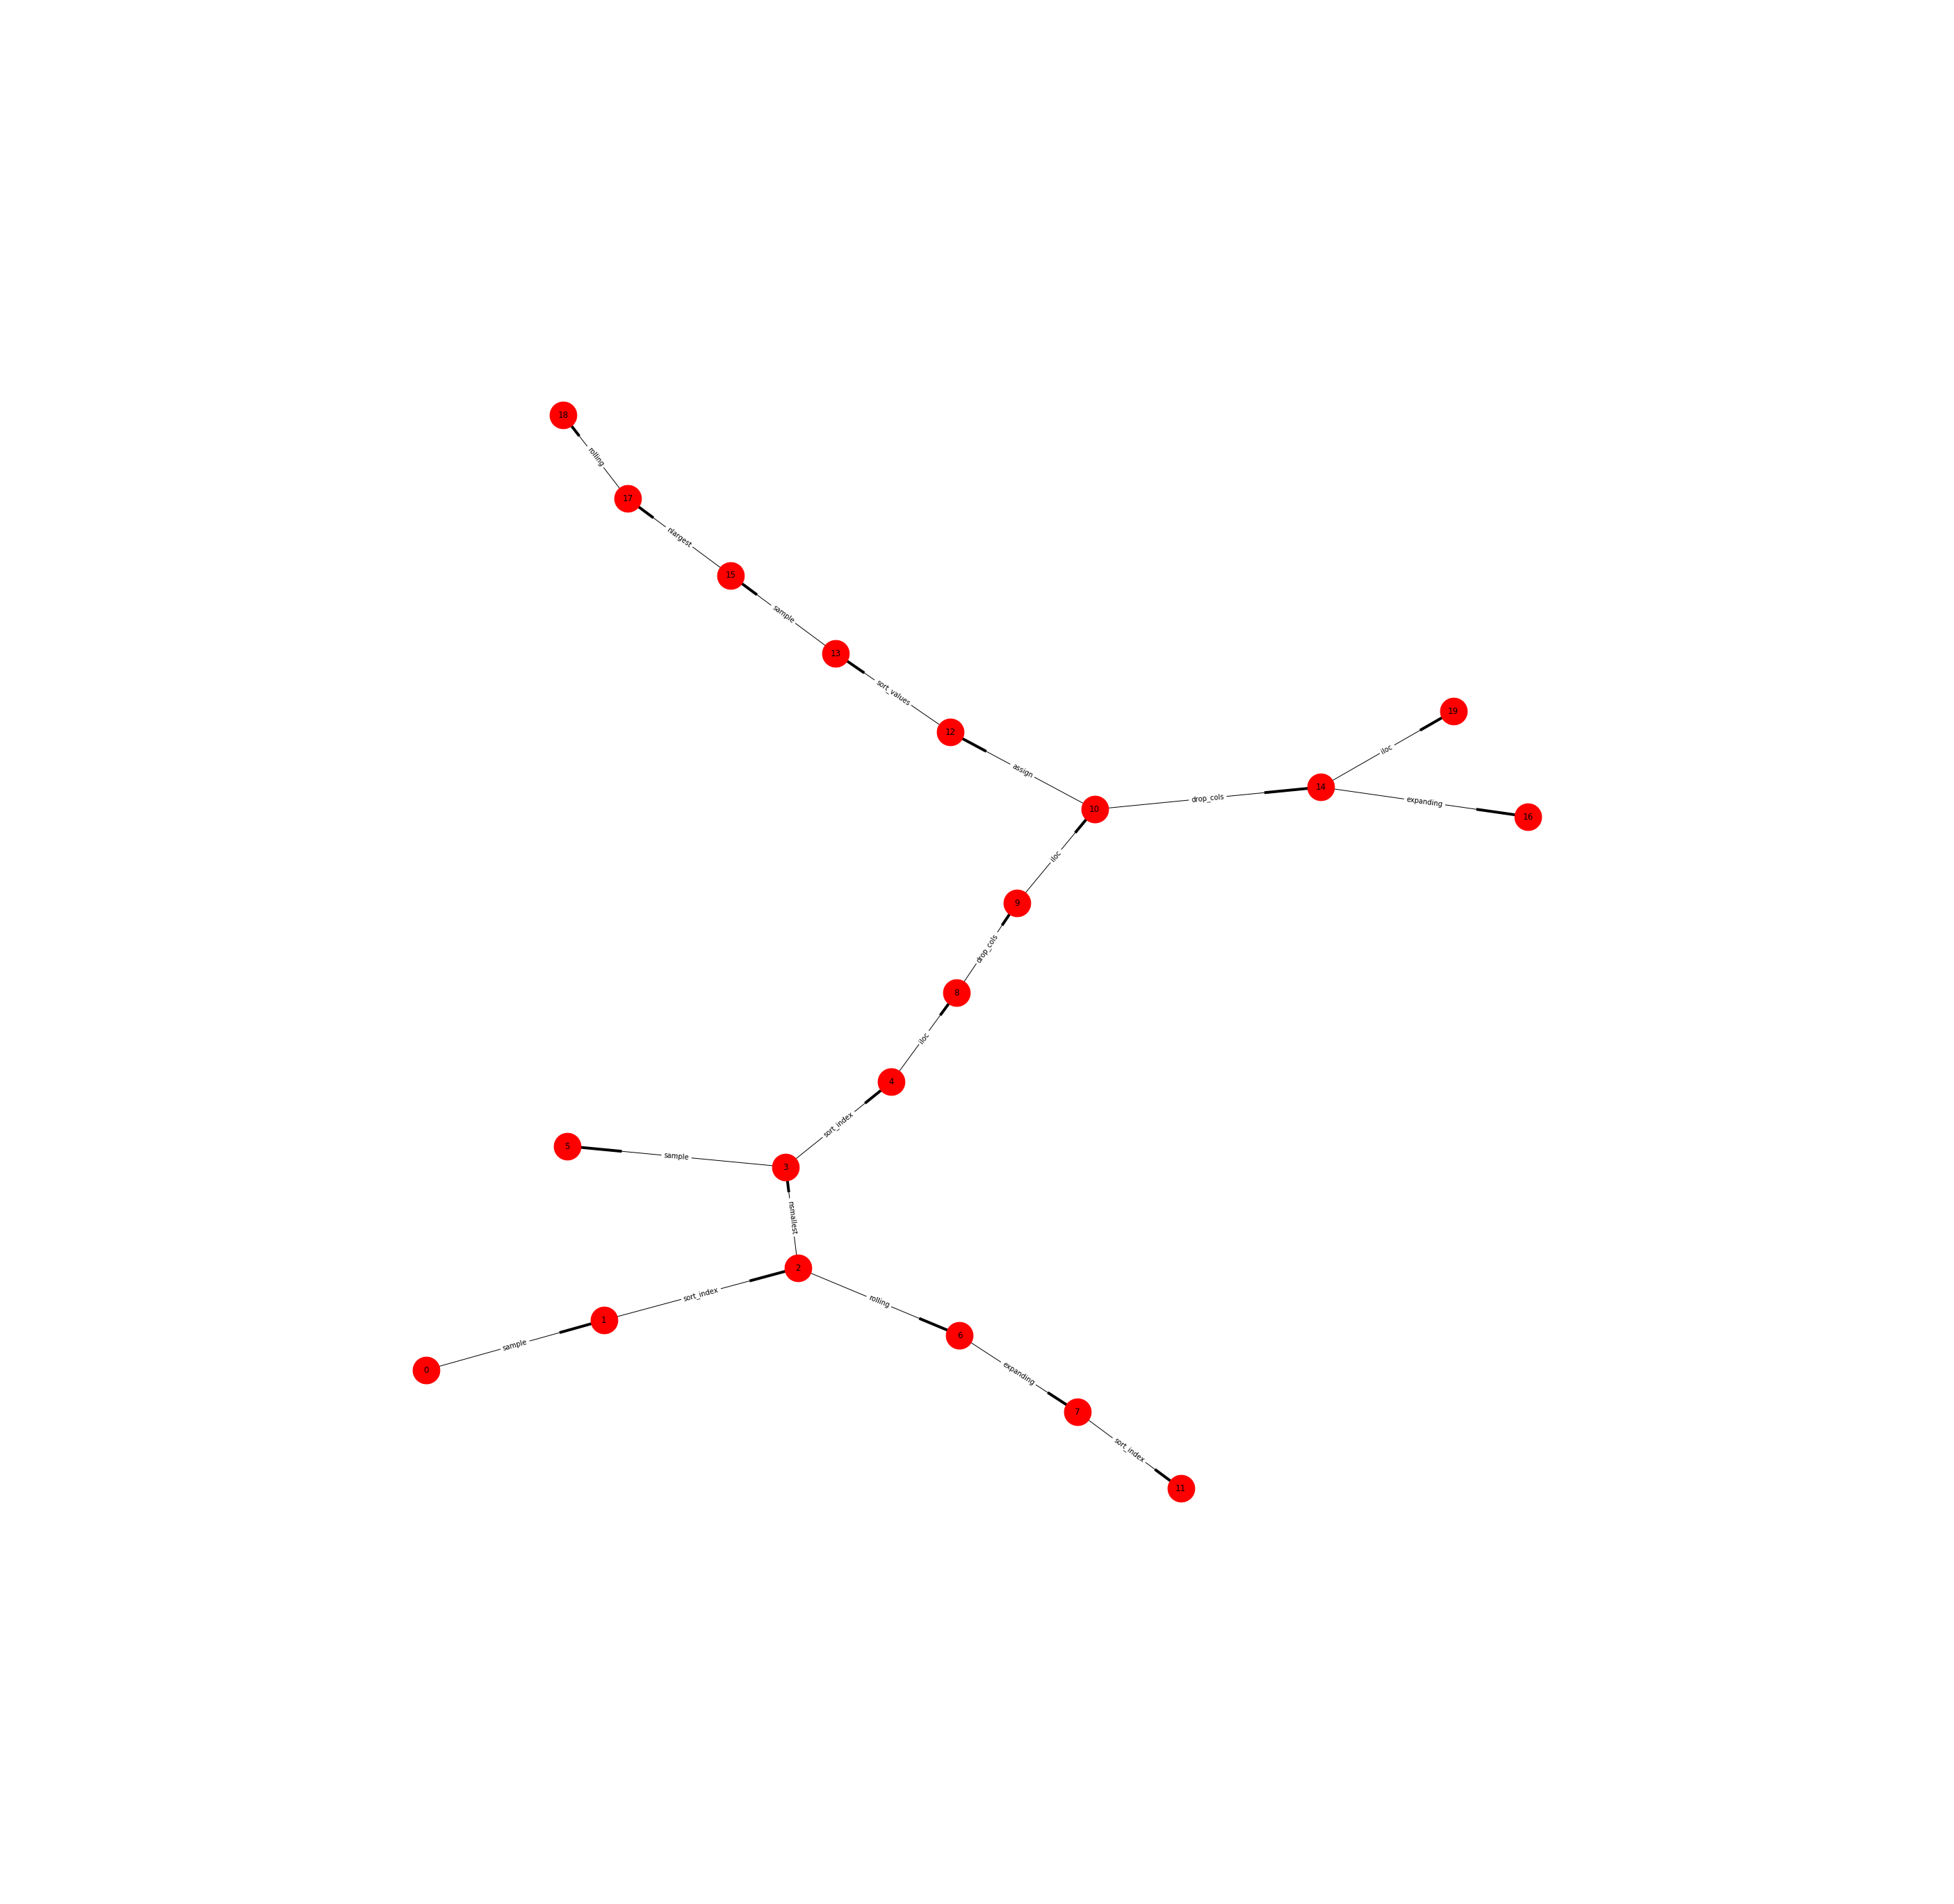

In [17]:
# Generate a dataset with base artifact size of 100 rows and 10 columns, with a workflow of 20 versions (artifacts)
# and a branching factor (scale=1.5), csv files are written out to directory called 'dataset'
version_cnt = 20
branch_factor = 1.5
row_cnt = 10000
col_cnt = 10
real_edges = data_gen(row_cnt, col_cnt, version_cnt, branch_factor)
#### calculate
e_dict = {}
for e in real_edges:
    e_dict[e[0] + ".csv " + e[1] + ".csv"] = 1
    e_dict[e[1]+ ".csv " + e[0]+ ".csv"]= 1

# lineage_inference()
# edges_cell, edges_col, edges_rel = read_edges()


# #rint (e_dict)
# inferred = [edges_cell, edges_col, edges_rel]
# for infer_edges in inferred:
#     common = 0
#     for e in infer_edges:
#         key = e[0] + " " + e[1]
#         #print (key)
#         if key in e_dict:
#             common += 1
#             #print (key)
#     print (common, len(e_dict)/2)


In [ ]:
# G = construct_edges(infer_edges)
# draw_graph(G, canvas_size=(40,40))